# Stats 202C - Project 1

## Importance Sampling and Sequential Monte Carlo

## Peter Racioppo (103953689)

## Problem 1

### 1) Importance sampling and the effective number of samples: In a 2-dimensional plane, suppose the target distribution π(x, y) is a symmetric Gaussian with mean μ = (2, 2) and standard deviation σ = 1 . Suppose we use an approximate distribution g(x, y) as the trial density which is a Gaussian with mean μ0 = (0, 0) with standard deviation σ0. So, 
### π(x,y) = (1/2π)*exp(-[(x-2)^2 + (y-2)^2]/2), g(x,y) = (1/2π*σ0^2)*exp(-[x^2 + y^2]/2σ0^2)
### We wish to estimate the quantity θ = integral (sqrt(y^2 + x^2)·π(x, y))·dxdy .
### In this question, we will compare the effectiveness of three alternative reference probabilities used in importance sampling.

### Alternative 1. Compute θ1 : estimate θ by drawing n1 samples directly from π(x, y) . Since the two dimensions are independent, we can sample x and y from the 1D marginal Gaussians.

### Alternative 2. Compute θ2 : estimate θ by drawing n2 samples from g(x, y) with σ0 = 1 .

### Alternative 3 Compute θ3 : estimate θ by drawing n3 samples from g(x, y) with σ0 = 4 .

In [238]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

import random
import math

In [239]:
# This function draws samples x and y from a
# normal distribution pi(x,y) and then estimates
# the quantity theta = sqrt(y^2 + x^2).
def f_Sample_Normal(mean,sigma,n):
    # Sample from normal distributions:
    x = np.random.normal(mean,sigma,n)
    y = np.random.normal(mean,sigma,n)

    # Compute the sample mean of theta:
    E_theta = np.mean(np.sqrt(x**2 + y**2))
    return E_theta

In [240]:
# This function draws samples x and y from a
# normal distribution g(x,y), weighted by
# w(x,y) = pi(x,y)/g(x,y), to compute the quantity
# theta = sqrt(y^2 + x^2), where x and y are
# drawn from another normal distribution pi(x,y).
def f_Sample_Normal_w(mu1,mu0,sigma1,sigma0,n):
    # Sample from normal distributions:
    x = np.random.normal(mu0,sigma0,n)
    y = np.random.normal(mu0,sigma0,n)
    
    # Computing importance sample weighting:
    t0 = ((x-mu0)**2 + (y-mu0)**2)/(2*sigma0**2)
    t1 = -((x-mu1)**2 + (y-mu1)**2)/(2*sigma1**2)
    w = (sigma0/sigma1)**2 * np.exp(t0+t1)
    
    # Compute the sample mean of theta:
    E_theta = np.mean(np.sqrt(x**2 + y**2)*w)
    return np.var(w), E_theta

### a) Plot θ1, θ2, θ3 over n (increasing n so that they converge) in one figure to compare the convergence rates. Before running the experiment, try to guess whether Alternative 3 is more effective than Alternative 2. Hint: You can use a log plot at a few points n = 10, 100, 1000, 10000, . . .

In [241]:
# This function computes estimates of theta for a range
# of values of n.
def f_Est(mean,sigma,mu1,mu0,sigma1,sigma0A,sigma0B,n):

    # Intialize vectors to hold estimates and variances:
    alt1 = np.zeros(order)
    alt2 = np.zeros(order)
    alt3 = np.zeros(order)
    w2_var = np.zeros(order)
    w3_var = np.zeros(order)

    # Sample using the 3 alternative methods:
    for i in np.arange(order):
        alt1[i] = f_Sample_Normal(mean=mean,sigma=sigma,n=n[i])
        w2_var[i], alt2[i] = f_Sample_Normal_w(mu1=mu1,mu0=mu0,sigma1=sigma1,sigma0=sigma0A,n=n[i])
        w3_var[i], alt3[i] = f_Sample_Normal_w(mu1=mu1,mu0=mu0,sigma1=sigma1,sigma0=sigma0B,n=n[i])
    
    return alt1, alt2, alt3, w2_var, w3_var

In [242]:
# Range of n values, up to 10^order:
order = 21
ep = np.arange(order)
n = 10*2**ep
alt1, alt2, alt3, w2_var, w3_var = f_Est(mean=2,sigma=1,mu1=2,mu0=0,sigma1=1,sigma0A=1,sigma0B=4,n=n)

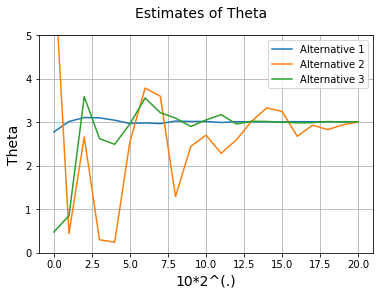

In [243]:
plt.plot(ep,alt1,label="Alternative 1")
plt.plot(ep,alt2,label="Alternative 2")
plt.plot(alt3,label="Alternative 3")
plt.suptitle('Estimates of Theta', fontsize=14)
plt.xlabel('10*2^(.)', fontsize=14)
plt.ylabel('Theta', fontsize=14)
plt.legend()
plt.ylim(0, 5)
plt.grid()
plt.show()

### Alternative 3 appears to be more effective than Alternative 3, which takes longer to settle. This is evidently because Alternative 3 has a larger variance, which allows it to more effectively sample the space over which π(x,y) is most dense.

### Let's visualize the errors:

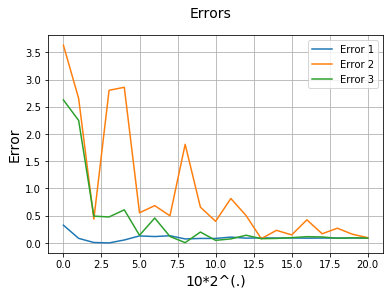

In [244]:
fin = alt1[sz-1]
err1 = np.absolute(fin-alt1)
err2 = np.absolute(fin-alt2)
err3 = np.absolute(fin-alt3)

plt.plot(ep,err1,label="Error 1")
plt.plot(ep,err2,label="Error 2")
plt.plot(ep,err3,label="Error 3")
plt.suptitle('Errors', fontsize=14)
plt.xlabel('10*2^(.)', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### b) Estimate the “effective sample size” for each alternative.

### In Lecture 2 Supplement we defined the effective sample size as:
### ess∗(n) = n*V_pi(theta_hat)/V_g(theta_hat)

### In Lecture 2 Supplement we suggested the approximation ess∗(n) ~ n / (1+V_g(w_n)) ~ n / (1+S_g^2(w_n)) = ess(n), where S_g^2(w_n) is the sample variance of the importance weights w. In this question we assess how good this approximation to ess∗(n) is.

### Since the samples in Alternative 1 are each “effective” samples of size 1 as they are directly drawn from the target distribution, we use ess∗(n1) = n1 as the truth and compare the effective sample sizes for Alternative 2 and Alternative 3, that is, the true ess∗(n2) and ess∗(n3) are the numbers when the estimated errors reach the same level as in Alternative 1.
### Plot ess∗(n2) over ess(n2), and ess(n3) over ess∗(n3) . Discuss your results.

In [245]:
# This function computes ess,
# the estimated sample size.
def f_ess(n,w_var):
    return (n / (1 + w_var))

In [246]:
# This function computes the
# estimated sample size ess
# over a range of n values.
def f_ess_n(w2_var,w3_var,order=5):

    # Range of n values, up to 10^order:
    ep = np.arange(order)
    n = 10**ep

    # Initialize vectors for
    # ess2_star and ess3_star:
    ess2 = np.zeros(order)
    ess3 = np.zeros(order)

    # Compute ess2 and ess3
    # for each value of n:
    for i in np.arange(order):
        ess2[i] = f_ess(n[i],w2_var[i])
        ess3[i] = f_ess(n[i],w3_var[i])
        
    return ess2, ess3

In [247]:
# This function estimates ess_star by computing the estimates
# of theta "it" times and computing the sample variance.
def f_ess_star(mu1,mu0,sigma1,sigma0A,sigma0B,order=5,it=10):
    
    # Range of n values, up to 10^order:
    ep = np.arange(order)
    n = 10**ep
    # Initialize vectors for
    # ess2_star and ess3_star:
    ess2_s = np.zeros(order)
    ess3_s = np.zeros(order)
    # Loop through the list of n values:
    for i in np.arange(order):
        # Initialize vectors to hold the
        # estimates of theta across iterations:
        alt1 = np.zeros(it)
        alt2 = np.zeros(it)
        alt3 = np.zeros(it)
        # Loop through the iterations:
        for j in np.arange(it):
            # Compute the estimates of theta at each iteration:
            alt1[j] = f_Sample_Normal(mean=mu1,sigma=sigma1,n=n[i])
            _, alt2[j] = f_Sample_Normal_w(mu1=mu1,mu0=mu0,sigma1=sigma1,sigma0=sigma0A,n=n[i])
            _, alt3[j] = f_Sample_Normal_w(mu1=mu1,mu0=mu0,sigma1=sigma1,sigma0=sigma0B,n=n[i])
        # For a given n, compute the sample
        # variance of all estimated values:
        Var1 = np.var(alt1)
        Var2 = np.var(alt2)
        Var3 = np.var(alt3)
        # Compute ess2_star and ess3_star:
        ess2_s[i] = n[i]*Var1/Var2
        ess3_s[i] = n[i]*Var1/Var3
        
    return ess2_s, ess3_s

In [250]:
order = 7
ep = np.arange(order)
n = 10**ep
_, _, _, w2_var, w3_var = f_Est(mean=2,sigma=1,mu1=2,mu0=0,sigma1=1,sigma0A=1,sigma0B=4,n=n)

In [251]:
ess2, ess3 = f_ess_n(w2_var,w3_var,order=order)
ess2_s, ess3_s = f_ess_star(mu1=2,mu0=0,sigma1=1,sigma0A=1,sigma0B=4,order=order,it=1000)

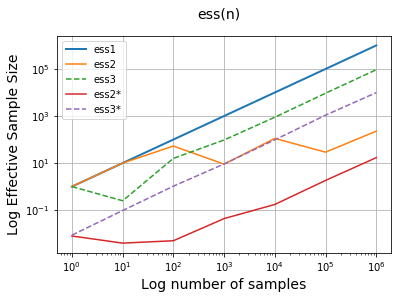

In [132]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(n,n,label="ess1",linewidth=2)
plt.plot(n,ess2,label="ess2")
plt.plot(n,ess3,label="ess3",linestyle='dashed')
plt.plot(n,ess2_s,label="ess2*")
plt.plot(n,ess3_s,label="ess3*",linestyle='dashed')
plt.suptitle('ess(n)', fontsize=14)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Effective Sample Size', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.grid()
plt.show()

### The third method evidently has a larger effective sample size than the second method (at least when there are many samples, which is when these numbers become most reliable), as I discussed in Part (b). The effective sample size for the second method is noisier,

### In both cases, the effective sample size is lower than the sample size using the original distribution, we is as we'd expect. The effective sample sizes for all three cases appear to grow at a similar rate with the number of samples.

### The approximation ess appears to be greater than ess* for all values of n, for both methods 2 and 3, but the difference appears to narrow with increasing large n.

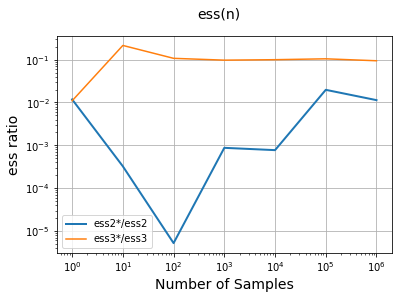

In [252]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(n,ess2_s/ess2,label="ess2*/ess2",linewidth=2)
plt.plot(n,ess3_s/ess3,label="ess3*/ess3")
plt.suptitle('ess(n)', fontsize=14)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('ess ratio', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.grid()
plt.show()

## Problem 2

### Estimating the number of Self-Avoiding-Walks in an (n + 1)×(n + 1) grid: This problem refers to the problem of counting the number of Self-Avoiding-Walks as described in Example 1.3 of BZ. Suppose we always start from position (0,0), i.e. the lower-left corner. We design a trial (reference) probability p(r) for a Self-Avoiding-Walk (SAW) r = (r1, r2, . . . , rN ) of varying length. Then we sample a number M SAWs from p(r), and the estimation process is described in the left panel of Figure 2.

### At each step, the trial probability p(r) can choose to stop (terminate the path) or walk to the left/right/up/down as long as it does not intersect itself. Each option is associated with a probability (of your design) and these probabilities sum to 1 at each point.

In [253]:
# This function randomly generates a SAW:
def f_SAW(x_i,y_i,x_min,x_max,y_min,y_max,it_max=1):
    # Inputs:
    # x_i, y_i: initial x and y positions
    # x_min, x_max: min and max x positions
    # y_min, y_max: min and max y positions
    # it_max: max # of iterations (optional)
    
    # Start at starting position:
    x = x_i
    y = y_i
    
    # Add as first value in position vector:
    x_vec = [x]
    y_vec = [y]
    
    p = 1 # Initialize the SAW probability
    
    i = 0
    while True:    
        opt_l = 1
        opt_r = 1
        opt_u = 1
        opt_d = 1
        # If the SAW is on the boundary, disallow
        # moves that would carry it outside the grid:
        if x == x_min:
            opt_l = 0
        if x == x_max:
            opt_r = 0
        if y == y_min:
            opt_d = 0
        if y == y_max:
            opt_u = 0

        # If the SAW is one move from intersecting itself,
        # disallow moves that would cause intersection:
        for j in np.arange(np.size(x_vec)):
            if y_vec[j] == y:
                if x_vec[j] == x-1:
                    opt_l = 0
                if x_vec[j] == x+1:
                    opt_r = 0
            if x_vec[j] == x:
                if y_vec[j] == y-1:
                    opt_d = 0
                if y_vec[j] == y+1:
                    opt_u = 0

        opts = [opt_l,opt_r,opt_d,opt_u] # Options (1 or 0):
        nt = np.count_nonzero(opts) # Number of nonzero counts

        # If no options, break:
        if nt == 0:
            break

        p = p/nt # Update the SAW probability
        
        nt_v = np.nonzero(opts)[0] # Find possible moves
        # Randomly make a move, weighting each of
        # the possibilities equally:
        direction = np.random.choice(nt_v)

        # Determine the new x and y coords:
        if direction == 0:
            x -= 1
        elif direction == 1:
            x += 1
        elif direction == 2:
            y -= 1
        else:
            y += 1

        # Append the latest value:
        x_vec.append(x)
        y_vec.append(y)

#         # Break after it_max iterations:
#         i += 1
#         if i == it_max:
#             break

    # Convert position vectors to arrays:
    x_vec = np.array(x_vec)
    y_vec = np.array(y_vec)
    
    # Outputs:
    # x_vec, y_vec: arrays of x and y positions
    return(x_vec, y_vec, p)

In [309]:
# This function randomly generates a SAW.
# The user can choose from three possible methods:

# Method 1 weights each permissible direction of
# movement at each time step equally.

# Method 2 encourages the SAW to move toward less
# explored  areas by weighting directions away from
# the SAW's "center of mass."

# Method 3 encourages the SAW to explore areas which
# have already been explored by biasing toward directions
# in the direction of the center of mass.

def f_SAW2(x_i,y_i,x_min,x_max,y_min,y_max,it_max=1,method=1):
    # Inputs:
    # x_i, y_i: initial x and y positions
    # x_min, x_max: min and max x positions
    # y_min, y_max: min and max y positions
    # it_max: max # of iterations (optional)
    
    # Start at starting position:
    x = x_i
    y = y_i
    
    # Add as first value in position vector:
    x_vec = [x]
    y_vec = [y]
    
    p = 1 # Initialize the SAW probability
    
    i = 0
    while True:    
        opt_l = 1
        opt_r = 1
        opt_u = 1
        opt_d = 1
        # If the SAW is on the boundary, disallow
        # moves that would carry it outside the grid:
        if x == x_min:
            opt_l = 0
        if x == x_max:
            opt_r = 0
        if y == y_min:
            opt_d = 0
        if y == y_max:
            opt_u = 0

        # If the SAW is one move from intersecting itself,
        # disallow moves that would cause intersection:
        for j in np.arange(np.size(x_vec)):
            if y_vec[j] == y:
                if x_vec[j] == x-1:
                    opt_l = 0
                if x_vec[j] == x+1:
                    opt_r = 0
            if x_vec[j] == x:
                if y_vec[j] == y-1:
                    opt_d = 0
                if y_vec[j] == y+1:
                    opt_u = 0

        opts = [opt_l,opt_r,opt_d,opt_u] # Options (1 or 0):
        nt = np.count_nonzero(opts) # Number of nonzero counts

        # If no options, break:
        if nt == 0:
            break
        
        nt_v = np.nonzero(opts)[0] # Find possible moves
        
        # If we are using Method 1, or we have taken
        # no more than 10 steps, equally weigh the
        # possible directions to move.
        if method == 1 or np.size(x_vec) <= 10:
            # Randomly make a move, weighting each of
            # the possibilities equally:
            direction = np.random.choice(nt_v)
            p = p/nt # Update the SAW probability
        # Else, we are using Method 2 or 3 and have
        # taken more than 10 steps.
        else:
            # Initialize an array 'dist' to hold the
            # distances for each permissible direction:
            dist = np.zeros(np.size(nt_v))
            
            # Loop through the permissible directions:
            for d_i in np.arange(np.size(nt_v)):
                # Set placeholders xt and yt to hold
                # the current x and y coordinates:
                xt = x
                yt = y
                
                # Set d, the current direction:
                d = nt_v[d_i]
                
                # Determine the new x and y coords
                # if we move in direction d and
                # update xt and yt:
                if d == 0:
                    xt -= 1
                elif d == 1:
                    xt += 1
                elif d == 2:
                    yt -= 1
                else:
                    yt += 1
                    
                # Calculate the distance 'dist' between the current position
                # (having moved in direction d) and the "center of mass" of
                # the SAW, its average x and y coords. We will use the
                # Manhattan norm as the measure of distance. To amplify the
                # effect, we can exponentiate the norm.
                dist[d_i] = (np.absolute(xt - np.mean(x_vec)) + np.absolute(yt - np.mean(y_vec)))**4
            
            # Set the probability of moving in each permissible direction
            # as the distance we would be from the center of mass, after
            # moving in that direction, normalized by the sum of such distances.
            # This is Method 2. Method 2 encourages the SAW to explore areas
            # in the grid which are less explored.
            pr = dist/np.sum(dist)
            
            # If we are instead using Method 3, reverse the most probable and
            # least probable directions. There are three possibilities: if we
            # can only move in 1 direction, this has no effect. If we can
            # move in 2 directions, these directions are flipped. If we can
            # move in 3 directions, the intermediately valued direction is
            # unchanged. Method 3 encourages the SAW to explore the parts of
            # the grid which are already more explored.
            if method == 3:
                # Find indices of maximum and
                # minimum probability:
                ix1 = np.argmax(pr)
                ix2 = np.argmin(pr)
                # Reverse the corresponding indices:
                pr[[ix1, ix2]] = pr[[ix2, ix1]]
            
            # Draw randomly from the permissble
            # directions, using the probability pr.
            dir_i = np.random.choice(np.arange(np.size(nt_v)),p=pr)
            direction = nt_v[dir_i] # The chosen direction
            p = p*pr[dir_i] # Update the SAW probability

        # Determine the new x and y coords:
        if direction == 0:
            x -= 1
        elif direction == 1:
            x += 1
        elif direction == 2:
            y -= 1
        else:
            y += 1

        # Append the latest value:
        x_vec.append(x)
        y_vec.append(y)

    # Convert position vectors to arrays:
    x_vec = np.array(x_vec)
    y_vec = np.array(y_vec)
    
    # Outputs:
    # x_vec, y_vec: arrays of x and y positions
    return(x_vec, y_vec, p)

In [310]:
# This function plots a given SAW
def f_Plot_grid(x_vec,y_vec,x_min,x_max,y_min,y_max):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(x_vec,y_vec)
    plt.xlim(x_min-0.1, x_max+0.1)
    plt.ylim(y_min-0.1, y_max+0.1)
    major_ticks = np.arange(x_min, x_max+1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    plt.show()

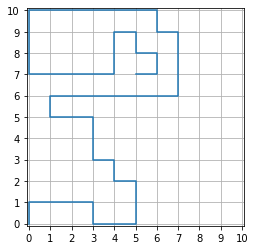

In [299]:
# Test: Computing and plotting a SAW

# Initial position:
x_i = 0
y_i = 0
# Size of grid:
n = 10
# Dimension of grid:
x_min = 0
x_max = n
y_min = 0
y_max = n

x_vec, y_vec, p = f_SAW2(x_i,y_i,x_min,x_max,y_min,y_max,method=1)

# print(x_vec)
# print(y_vec)
# print(1/p)

f_Plot_grid(x_vec,y_vec,x_min,x_max,y_min,y_max)

### a) What is the total number, K, of SAWs for n=10? Hint: Try M=10^7 to 10^8. To clarify: a square is considered a 2×2 grid with n = 1 . Plot K against M (in a log-log plot) and monitor whether the Sequential Importance Sampling (SIS) process has converged. Try to compare at least three different designs for p(r) and see which is more efficient. For example, you may start from a path that you find before multiple times, as long as you compute the p(r) correctly.

In [311]:
# This function computes the estimated number of SAWs that
# exist as a funtion of M_vec, the number of samples.
def f_SAW_kM(x_i,y_i,x_min,x_max,y_min,y_max,order,method=1):

    k = 0
    ep = np.linspace(0,order,order*5+1)
    M_vec = 10**ep # Number of samples
    # Initialize array of estimates:
    K_vec = np.zeros(np.size(ep))
    
    # Loop through the possible number of samples:
    for i in np.arange(np.size(ep)):
        # Simulate a given number of samples:
        for j in np.arange(M_vec[i]):
            # x_vec, y_vec, p = f_SAW(x_i,y_i,x_min,x_max,y_min,y_max)
            x_vec, y_vec, p = f_SAW2(x_i,y_i,x_min,x_max,y_min,y_max,method)
            k += 1/p
        # Estimated number of SAWs, for a given number of samples:
        K_vec[i] = k/M_vec[i]
    return(M_vec, K_vec)

In [327]:
def f_Plot(M_vec,K_vec):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(M_vec,K_vec)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of SAWs')
    plt.suptitle('Estimated number of SAWs vs Sample Size', fontsize=14)
    plt.grid()
    plt.show()

In [328]:
def f_Plot3(M_vec1,K_vec1,M_vec2,K_vec2,M_vec3,K_vec3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(M_vec1,K_vec1,label="Method 1")
    plt.plot(M_vec2,K_vec2,label="Method 2")
    plt.plot(M_vec3,K_vec3,label="Method 3")
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of SAWs')
    plt.suptitle('Estimated number of SAWs vs Sample Size', fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

In [300]:
# Initial position:
x_i = 0
y_i = 0
# Size of grid:
n = 10
# Dimension of grid:
x_min = 0
x_max = n
y_min = 0
y_max = n

In [301]:
# Simulate using Method 1:
M_vec1, K_vec1 = f_SAW_kM(x_i,y_i,x_min,x_max,y_min,y_max,order=4,method=1)

In [312]:
# Simulate using Method 2:
M_vec2, K_vec2 = f_SAW_kM(x_i,y_i,x_min,x_max,y_min,y_max,order=4,method=2)

In [313]:
# Simulate using Method 3:
M_vec3, K_vec3 = f_SAW_kM(x_i,y_i,x_min,x_max,y_min,y_max,order=4,method=3)

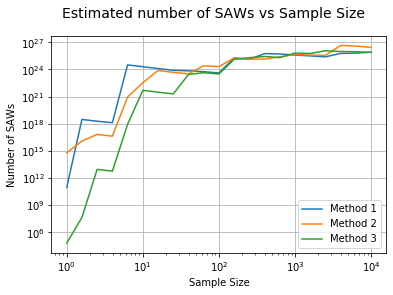

IndexError: index 21 is out of bounds for axis 0 with size 21

In [332]:
f_Plot3(M_vec1,K_vec1,M_vec2,K_vec2,M_vec3,K_vec3)
print(K_vec1[np.size(K_vec1-1)])

### I compared three methods:

### Method 1 weights each permissible direction of movement at each time step equally.

### Method 2 encourages the SAW to move toward less explored  areas by weighting directions away from the SAW's "center of mass."

### Method 3 encourages the SAW to explore areas which have already been explored by biasing toward directions in the direction of the center of mass.

### Method 2 appears to converge slightly faster and Method 3 slightly slower. Playing with weightings in these methods might improve performance.

### b) What is the total number of SAWs that start from (0,0) and end at (n,n)? Here you can still use the same sampling procedure above, but only record the SAWs which successfully reach (n, n) . As we noted, the true number is 1.5687×10^24 .

In [353]:
# This function computes the number of SAWs
# ending at position x_f, y_f, as a function
# of the number of samples.
def f_SAW_kM_nn(x_i,y_i,x_f,y_f,x_min,x_max,y_min,y_max,order):

    k = 0
    ep = np.linspace(0,order,order*5+1)
    M_vec = 10**ep # Number of samples
    K_vec = np.zeros(np.size(ep))
    
    # Loop through sample sizes:
    for i in np.arange(np.size(ep)):
        # Simulate for a given sample size:
        for j in np.arange(M_vec[i]):
            x_vec, y_vec, p = f_SAW(x_i,y_i,x_min,x_max,y_min,y_max)
            # If the SAW ends on the desired coordinates, increment the counter:
            if x_vec[np.size(x_vec)-1] == x_f and y_vec[np.size(y_vec)-1] == y_f:
                k += 1/p
        K_vec[i] = k/M_vec[i] # Total number of counted SAWs
    return(M_vec, K_vec)

In [354]:
# Compute the number of SAWs in a 10x10
# grid ending on 10, 10:

x_i = 0
y_i = 0
x_min = 0
x_max = 10
y_min = 0
y_max = 10
x_f = x_max
y_f = y_max

k = 0
order = 4

M_vec, K_vec = f_SAW_kM_nn(x_i,y_i,x_f,y_f,x_min,x_max,y_min,y_max,order)

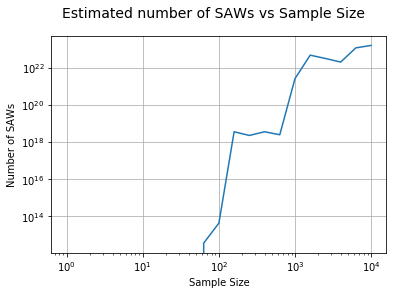

1.62594674118533e+23


In [331]:
f_Plot(M_vec,K_vec)
print(K_vec[np.size(K_vec)-1])

### c) For each experiment in a) and b), plot the distribution of the lengths, N, of the SAWs in a histogram (Think: Do you need to weight the SAWs in calculating the histogram?) and visualize (print) the longest SAW that you find.

In [376]:
# This function computes the distribution
# of the lengths of SAW samples.
def f_SAW_kM_N(x_i,y_i,x_min,x_max,y_min,y_max,k,M,max_l,method=1):

    N_vec = np.zeros(max_l)

    for j in np.arange(M):
        # _, _, p = f_SAW(x_i,y_i,x_min,x_max,y_min,y_max)
        _, _, p = f_SAW2(x_i,y_i,x_min,x_max,y_min,y_max,method)
        k += 1/p
        # if x_vec[np.size(x_vec)-1] == x_f and y_vec[np.size(y_vec)-1] == y_f:
        #    k += 1/p
        # Increment the counter in the index corresponding to
        # the length of the SAW, weighting the counter by 1/p.
        N_vec[np.size(x_vec)-1] += 1/p
        
    K = k/M # Total number of SAWs
    
    return(M_vec, K_vec, N_vec)

In [372]:
M = 1e4 # Number of samples
max_l = 120 # Max SAW length

### Histogram for Method 1:

In [347]:
_, _, N_vec1 = f_SAW_kM_N(x_i,y_i,x_min,x_max,y_min,y_max,k,M,max_l,method=1)

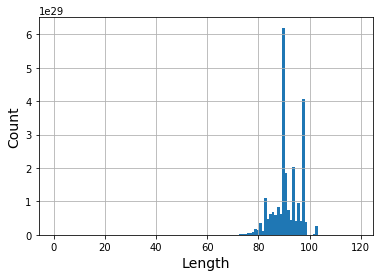

In [343]:
# Histogram:
plt.hist(np.arange(max_l),weights=N_vec1,bins=max_l)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()
plt.show()

### Histogram for Method 2:

In [348]:
_, _, N_vec2 = f_SAW_kM_N(x_i,y_i,x_min,x_max,y_min,y_max,k,M,max_l,method=2)

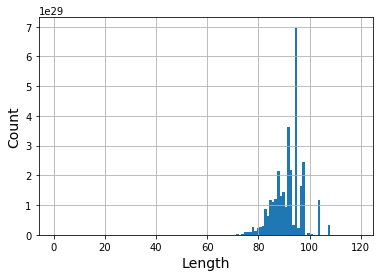

In [349]:
# Histogram:
plt.hist(np.arange(max_l),weights=N_vec2,bins=max_l)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()
plt.show()

### Histogram for Method 3:

In [350]:
_, _, N_vec3 = f_SAW_kM_N(x_i,y_i,x_min,x_max,y_min,y_max,k,M,max_l,method=3)

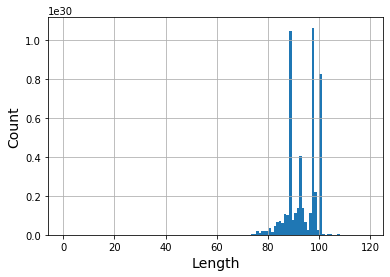

In [352]:
# Histogram:
plt.hist(np.arange(max_l),weights=N_vec3,bins=max_l)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()
plt.show()